**pandas demo**

_Евгений Борисов <esborisov@sevsu.ru>_

---

Pandas: Chart Visualization    
https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

Формат таблиц в pandas   
https://habr.com/ru/post/521894/

In [1]:
import pandas as pd
import numpy as np
from numpy import random as rng

In [2]:
pd.options.display.max_colwidth = 200 # ширина таблицы pandas при печати
np.set_printoptions(precision=2) # вывод на печать до 2 знака

## eurostat

In [5]:
# !pip3 install eurostat

In [4]:
# статистика по странам Евросоюза
# https://ec.europa.eu/eurostat
import eurostat

In [6]:
# список тем в источнике
toc = eurostat.get_toc_df().drop_duplicates()
toc.sample(10)

,title,code,type,last update of data,last table structure change,data start,data end
130,Maritime transport infrastructure: ports,MED_MA1,dataset,2020-05-28T23:00:00+0200,2020-05-28T23:00:00+0200,2005,2019
3988,"National road freight transport by distance class, type of goods and type of transport (t) - annual data (1982-2007)",ROAD_GO_NA7DCTG,dataset,2023-04-17T23:00:00+0200,2023-12-21T23:00:00+0100,1982,2007
1626,Percentage of enterprises undergoing technological or structural changes by size class,TRNG_ENT18S,dataset,2009-03-27T11:00:00+0100,2024-01-03T23:00:00+0100,1999,1999
5347,Mean and median income by degree of urbanisation,ILC_DI17,dataset,2024-02-02T23:00:00+0100,2024-02-02T23:00:00+0100,2003,2023
2129,Deaths (total) by other typologies,URT_DEATHS,dataset,2024-01-25T23:00:00+0100,2024-01-03T23:00:00+0100,1990,2021
3820,Median number of weekly hours of formal care by age group - children with at least 1 hour of formal care - EU-SILC survey,ILC_CAMDFORG0,dataset,2024-02-02T23:00:00+0100,2024-02-02T23:00:00+0100,2005,2023
5973,Air pollutants,ENPS_ENV_AIR_EMIS,dataset,2023-03-13T23:00:00+0100,2023-03-13T23:00:00+0100,2005,2021
4555,"Pupils aged 3 years old, by sex - as % of the population of the corresponding age group",EDUC_UOE_ENRA20,dataset,2023-12-04T23:00:00+0100,2024-01-03T23:00:00+0100,2013,2021
3317,"Relative prevalence rate of work-related health problems by severity, diagnosis group, permanency of the job, length of service in the enterprise and NACE Rev. 1.1 activity",HSW_HP_SVCLN,dataset,2010-01-18T11:00:00+0100,2024-01-03T23:00:00+0100,1999,1999
2163,"Unemployment rates by sex, age and country of birth (%)",LFSQ_URGACOB,dataset,2023-12-15T11:00:00+0100,2023-12-15T11:00:00+0100,1998-Q1,2023-Q3


In [7]:
# Animal populations by NUTS 2 regions
df = eurostat.get_data_df('tgs00045')
display(len(df))
df.sample(10)

1203

,freq,animals,unit,geo\TIME_PERIOD,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
919,A,A4100,THS_HD,ITI3,130.11,136.55,144.95,144.97,148.22,157.82,156.92,151.06,150.31,145.51,137.03,NaN
896,A,A4100,THS_HD,IE04,NaN,NaN,NaN,NaN,NaN,1910.07,1871.90,1918.32,1983.31,2031.61,2047.71,NaN
745,A,A3100,THS_HD,PT20,33.02,29.67,28.83,30.39,29.07,30.25,33.44,34.12,44.62,40.95,41.68,NaN
107,A,A2000,THS_HD,FRC1,1354.00,1347.00,1348.00,1374.00,1319.00,1321.31,1292.93,1269.33,1257.15,1231.66,1223.22,NaN
94,A,A2000,THS_HD,ES64,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN
86,A,A2000,THS_HD,ES42,350.01,354.47,360.55,397.79,425.93,460.35,470.16,479.81,480.22,466.72,468.12,NaN
1136,A,A4200,THS_HD,ME00,23.00,30.00,33.00,30.00,31.00,29.00,29.00,28.70,27.82,29.03,862.87,NaN
361,A,A2300F,THS_HD,FRD2,130.00,131.00,131.00,127.00,125.00,123.21,122.48,118.08,113.34,110.21,108.59,NaN
102,A,A2000,THS_HD,FR30,687.00,701.00,709.00,710.00,694.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1148,A,A4200,THS_HD,NL34,1.00,1.00,1.00,1.00,3.00,3.00,3.00,4.00,4.00,5.00,5.00,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1203 entries, 0 to 1202
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   freq             1203 non-null   object 
 1   animals          1203 non-null   object 
 2   unit             1203 non-null   object 
 3   geo\TIME_PERIOD  1203 non-null   object 
 4   2012             1012 non-null   float64
 5   2013             990 non-null    float64
 6   2014             949 non-null    float64
 7   2015             973 non-null    float64
 8   2016             1017 non-null   float64
 9   2017             972 non-null    float64
 10  2018             956 non-null    float64
 11  2019             960 non-null    float64
 12  2020             946 non-null    float64
 13  2021             944 non-null    float64
 14  2022             959 non-null    float64
 15  2023             14 non-null     float64
dtypes: float64(12), object(4)
memory usage: 150.5+ KB


<Axes: title={'center': 'A / A4100 / THS_HD'}>

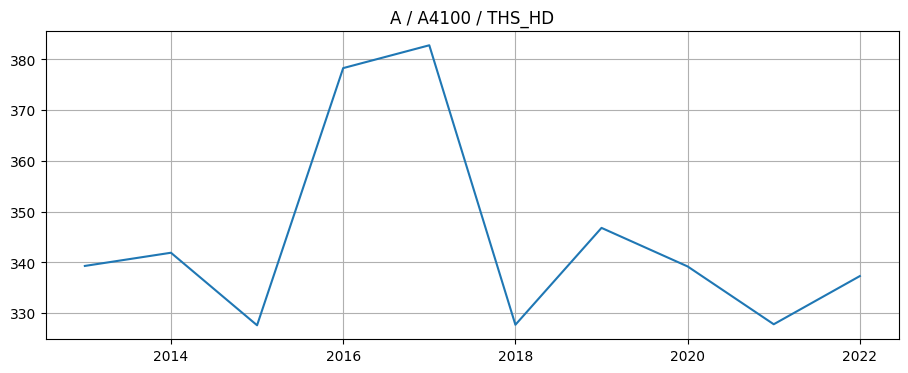

In [9]:
n = rng.randint(len(df)) # выбираем запись
title = ' / '.join( df.iloc[n,:3].to_list() )
df.iloc[n,4:].plot(grid=True,figsize=(11,4), title=title)

## wikipedia

https://en.wikipedia.org/wiki/Demographics_of_India

In [12]:
# !pip3 install lxml

In [13]:
df = pd.read_html('https://en.wikipedia.org/wiki/Demographics_of_India')
display( len(df) )

56

In [14]:
df_ = df[8]
df_

,Rank,State/UT,Population[60],Percent (%),Male,Female,Difference between male and female,Sex ratio,Rural[61],Urban[61],Area[62] (km2),Density (per km2)
0,1,Uttar Pradesh,199812341,16.50,104480510,95331831,9148679,930,155111022,44470455,240928,828
1,2,Maharashtra,112374333,9.28,58243056,54131277,4111779,929,61545441,50827531,307713,365
2,3,Bihar,104099452,8.60,54278157,49821295,4456862,918,92075028,11729609,94163,1102
3,4,West Bengal,91276115,7.54,46809027,44467088,2341939,950,62213676,29134060,88752,1030
4,5,Madhya Pradesh,72626809,6.00,37612306,35014503,2597803,931,52537899,20059666,308245,236
5,6,Tamil Nadu,72147030,5.96,36137975,36009055,128920,996,37189229,34949729,130058,555
6,7,Rajasthan,68548437,5.66,35550997,32997440,2553557,928,51540236,17080776,342239,201
7,8,Karnataka,61095297,5.05,30966657,30128640,838017,973,37552529,23578175,191791,319
8,9,Gujarat,60439692,4.99,31491260,28948432,2542828,919,34670817,25712811,196024,308
9,10,Andhra Pradesh,49386799,4.08,24738068,24648731,89337,996,34776389,14610410,160205,308


In [15]:
df_ = df_[   df_['State/UT']!='Total (India)'  ]

In [16]:
display(df_.info() )

<class 'pandas.core.frame.DataFrame'>
Index: 36 entries, 0 to 35
Data columns (total 12 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Rank                                36 non-null     object 
 1   State/UT                            36 non-null     object 
 2   Population[60]                      36 non-null     int64  
 3   Percent (%)                         36 non-null     float64
 4   Male                                36 non-null     int64  
 5   Female                              36 non-null     int64  
 6   Difference between male and female  36 non-null     object 
 7   Sex ratio                           36 non-null     int64  
 8   Rural[61]                           36 non-null     int64  
 9   Urban[61]                           36 non-null     int64  
 10  Area[62] (km2)                      36 non-null     int64  
 11  Density (per km2)                   36 non-null     

None

In [17]:
df_ = df_.convert_dtypes()
display(df_.info() )

<class 'pandas.core.frame.DataFrame'>
Index: 36 entries, 0 to 35
Data columns (total 12 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Rank                                36 non-null     string 
 1   State/UT                            36 non-null     string 
 2   Population[60]                      36 non-null     Int64  
 3   Percent (%)                         36 non-null     Float64
 4   Male                                36 non-null     Int64  
 5   Female                              36 non-null     Int64  
 6   Difference between male and female  36 non-null     string 
 7   Sex ratio                           36 non-null     Int64  
 8   Rural[61]                           36 non-null     Int64  
 9   Urban[61]                           36 non-null     Int64  
 10  Area[62] (km2)                      36 non-null     Int64  
 11  Density (per km2)                   36 non-null     

None

<Axes: ylabel='State/UT'>

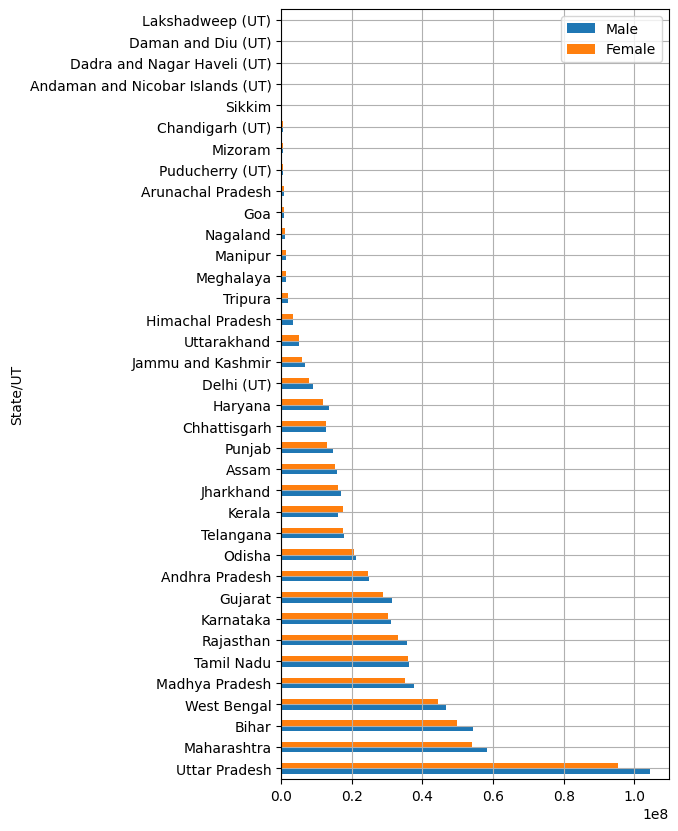

In [18]:
(
df_[['State/UT','Male','Female']]
.set_index('State/UT')
.plot.barh(figsize=(5,10),grid=True)
)

In [19]:
col = 'Difference between male and female'
df_[col] = pd.to_numeric(df_[col].str.replace(',','').str.replace('−','-'))

In [20]:
df_.style.bar(
    subset=[col],
      align='mid',
      color=['coral', 'yellowgreen'],
      vmin=df_[col].min(),
      vmax=df_[col].max()
     )

,Rank,State/UT,Population[60],Percent (%),Male,Female,Difference between male and female,Sex ratio,Rural[61],Urban[61],Area[62] (km2),Density (per km2)
0,1,Uttar Pradesh,199812341,16.500000,104480510,95331831,9148679,930,155111022,44470455,240928,828
1,2,Maharashtra,112374333,9.280000,58243056,54131277,4111779,929,61545441,50827531,307713,365
2,3,Bihar,104099452,8.600000,54278157,49821295,4456862,918,92075028,11729609,94163,1102
3,4,West Bengal,91276115,7.540000,46809027,44467088,2341939,950,62213676,29134060,88752,1030
4,5,Madhya Pradesh,72626809,6.000000,37612306,35014503,2597803,931,52537899,20059666,308245,236
5,6,Tamil Nadu,72147030,5.960000,36137975,36009055,128920,996,37189229,34949729,130058,555
6,7,Rajasthan,68548437,5.660000,35550997,32997440,2553557,928,51540236,17080776,342239,201
7,8,Karnataka,61095297,5.050000,30966657,30128640,838017,973,37552529,23578175,191791,319
8,9,Gujarat,60439692,4.990000,31491260,28948432,2542828,919,34670817,25712811,196024,308
9,10,Andhra Pradesh,49386799,4.080000,24738068,24648731,89337,996,34776389,14610410,160205,308


In [21]:
df_[['Male','Female']].describe().T

,count,mean,std,min,25%,50%,75%,max
Male,36.0,17310287.75,22360878.93512,33123.0,732833.0,10860110.5,26295215.25,104480510.0
Female,36.0,16321794.944444,20700554.819702,31350.0,707007.5,9828671.5,25723656.25,95331831.0


---

**упражнения**

https://github.com/ajcr/100-pandas-puzzles

---

In [22]:
# !pip3 install watermark
# Python package versions used
%load_ext watermark
%watermark --python
%watermark --iversions
#

Python implementation: CPython
Python version       : 3.11.6
IPython version      : 8.21.0

eurostat: 1.0.4
numpy   : 1.26.3
pandas  : 2.2.0

